## Assignment 

Assignment:4
1. you have to create one supervisor node.
2. create one router function
3. create three more node
3.1 llm call (llm node)
3.2 RAG (rag node)
3.3 web crawler(fetch the info in realtime from internet)
4. created one more node after this for validation for generated output --> explore the validation part how to do that
5. if validation going to be failed in that case again go to supervioser node and then supervisor node will again decide what needs to be call next
6. once the validation will pass then only generate the final output

submission deadline till 9pm friday

submission instruction:
create your github repo and keep all the assisgnments over there(in that github repo)
i will share one googleform in group after completing your assignment you can share the github link through that google form. 

In [493]:
print("Hell0")

Hell0


In [494]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash-preview-05-20')
output=model.invoke("who are goswami in vrindavan")
print(output.content)

In Vrindavan, the term "Goswami" holds immense spiritual and historical significance, primarily within the **Gaudiya Vaishnava tradition**. It refers to a lineage of highly revered spiritual masters, scholars, and devotees who played a pivotal role in establishing and propagating the worship of Radha and Krishna, particularly as envisioned by Sri Chaitanya Mahaprabhu.

Here's a breakdown of who the Goswamis are in Vrindavan:

1.  **The Original Six Goswamis of Vrindavan (Shad Goswami):**
    These are the most important and foundational Goswamis. They were direct disciples of Sri Chaitanya Mahaprabhu (1486–1534 AD) and were sent by him to Vrindavan in the 16th century with a specific mission. Their contributions are the bedrock of Gaudiya Vaishnavism:
    *   **Their Mission:**
        *   **Rediscover Lost Holy Sites:** They located many of the places where Krishna performed his pastimes 5,000 years ago.
        *   **Establish Temples:** They were instrumental in establishing the fir

In [495]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

384

## Loading the text file and storing in VDB

In [496]:
from langchain_community.document_loaders import TextLoader,DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [497]:
loader=DirectoryLoader("./data2",glob="./*.txt",loader_cls=TextLoader)

In [498]:
docs=loader.load()

In [499]:
docs

[Document(metadata={'source': 'data2/usa.txt'}, page_content="🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2

In [500]:
docs[0].page_content

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [501]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 200
)

In [502]:
new_docs = text_splitter.split_documents(documents=docs)

In [503]:
new_docs

[Document(metadata={'source': 'data2/usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.'),
 Document(metadata={'source': 'data2/usa.txt'}, page_content='U.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 

In [504]:
doc_string = [doc.page_content for doc in new_docs]
doc_string
# len(doc_string)

['🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.',
 'U.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hov

In [505]:
from langchain_community.vectorstores import chroma
db = Chroma.from_documents(new_docs,embeddings)

In [506]:
retriever = db.as_retriever(seach_kwargs={"k":3})
retriever.invoke("Key Economic Strengths of USA")

[Document(metadata={'source': 'data2/usa.txt'}, page_content='Key Economic Strengths'),
 Document(metadata={'source': 'data2/usa.txt'}, page_content='Key Economic Strengths'),
 Document(metadata={'source': 'data2/usa.txt'}, page_content='Key Economic Strengths'),
 Document(metadata={'source': 'data2/usa.txt'}, page_content='Key Economic Strengths')]

## Creating pyndantic chain

In [507]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [508]:
class TopicSelectionParser (BaseModel):
    Topic:str=Field(description="Selected topic")
    Reasoning:str = Field(description="Reasoning behind the topic selection")

In [509]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "Selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "Selected topic", "title": "Topic", "type": "string"}, "Reasoninig": {"description": "Reasining behind the topic selection", "title": "Reasoninig", "type": "string"}}, "required": ["Topic", "Reasoninig"]}\n```'

## Defining the state

In [510]:
class AgentState(TypedDict):
   messages : Annotated[Sequence[BaseMessage],operator.add]

In [511]:
state = {"messages":["hi"]}

In [512]:
state

{'messages': ['hi']}

In [513]:
def function_1(state:AgentState):
    question = state["messages"][-1]
    print("question",question)
    template = """Your task is to classify the given user query into one of the following categories : [USA,web_service,Not Related].
                  Only respond with the category name and nothing else.
                  User query :{question}
                  {format_instructions}
                  """
    prompt = PromptTemplate(
        template=template,
        input_variables = ["question"],
        partial_variables={"format_instructions":parser.get_format_instructions()}
    )

    chain = prompt | model | parser
    response = chain.invoke({"question":question})
    print("Parsed response",response)
    return{"messages":[response.Topic]}


In [514]:
#Test 1
state ={"messages":["What's the current unemployment rate in the United States?"]}
function_1(state)

question What's the current unemployment rate in the United States?
Parsed response Topic='USA' Reasoning="The user query explicitly asks for information about the 'United States', specifically its unemployment rate, which directly pertains to the USA category."


{'messages': ['USA']}

In [515]:
#Test 2
state ={"messages":["What's the today' weather"]}
function_1(state)

question What's the today' weather
Parsed response Topic='web_service' Reasoning="The user query 'What's the today's weather' seeks information that is commonly provided by a web service, such as a weather API or a weather website."


{'messages': ['web_service']}

In [516]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description="Reasoning behind topic selection")

In [517]:
def router (state:AgentState):
    print("-> ROUTER ->")

    last_message = state["messages"][-1]
    print("last_messages:",last_message)

    if "usa" in last_message.lower():
        return "RAG"
    elif "web_service" in last_message.lower():
        return "web_services"
    else :
        return "LLM"

In [518]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


In [519]:
# RAG_function
def function_2(state:AgentState):
    print("->RAG call->")
    question = state["messages"][0]
    prompt = PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following piece of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.

Question: {question}
Context: {context}
Answer:""",
        input_variables=['context', 'question']
    )
    rag_chain = (
        {"context":retriever|format_docs,"question":RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return{"messages":[result]}

In [520]:
# LLM Function
def function_3(state:AgentState):
    print("->LLM Call-->")
    question = state["messages"][0]
    complete_query = "Answer the following questions with your knowledge of the real world.Following is the user question:"+question
    response=model.invoke(complete_query)
    return{"messages":[response.content]}

In [521]:
#Test
state = {"messages":["What is a LLM"]}
function_3(state)

->LLM Call-->


{'messages': ['An **LLM** stands for **Large Language Model**.\n\nHere\'s a breakdown of what that means:\n\n1.  **Large:** This refers to two main things:\n    *   **Vast Amount of Data:** LLMs are trained on enormous datasets of text and code (trillions of words) scraped from the internet (books, articles, websites, conversations, etc.). This massive exposure allows them to learn complex patterns, grammar, facts, and relationships between words.\n    *   **Massive Number of Parameters:** These models have billions, or even trillions, of "parameters" – essentially the internal variables and connections within the neural network that allow it to learn and make predictions. More parameters generally mean a more complex and capable model.\n\n2.  **Language:** Their primary function is to understand, generate, and process human language (text). They are designed to interact with us using natural language, similar to how humans communicate.\n\n3.  **Model:** This refers to a type of artifi

In [522]:
# from langchain_community.tools.tavily_search import TavilySearchResults

# def function_4(state:AgentState):
#     print("-->web_services")
#     question = state["messages"][0]
#     import os
#     TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
#     print(TAVILY_API_KEY)
#     tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)
#     result = tool.invoke({"query":question})
#     return result 

def function_4(state: AgentState):
    print("-->web_services")
    question = state["messages"][0]
    
    try:
        import os
        TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
        
        if not TAVILY_API_KEY:
            return {"messages": ["Web search unavailable - API key not found"]}
        
        tool = TavilySearchResults(tavily_api_key=TAVILY_API_KEY)
        search_results = tool.invoke({"query": question})
        
        # ✅ Format the results into a readable response
        if search_results:
            formatted_response = f"Based on current web search results for '{question}':\n\n"
            
            for i, result in enumerate(search_results[:3], 1):  # Top 3 results
                title = result.get('title', 'No title')
                content = result.get('content', 'No content')
                url = result.get('url', 'No URL')
                
                # Trim content to manageable length
                content_preview = content[:300] + "..." if len(content) > 300 else content
                
                formatted_response += f"{i}. **{title}**\n"
                formatted_response += f"   {content_preview}\n"
                formatted_response += f"   Source: {url}\n\n"
        else:
            formatted_response = f"No search results found for '{question}'"
        
        # ✅ Return properly formatted state dictionary
        return {"messages": [formatted_response]}
        
    except Exception as e:
        # ✅ Handle errors gracefully
        return {"messages": [f"Web search failed: {str(e)}"]}


In [523]:
#test
state = {"messages":["What is Atlanta"]}
function_4(state)

-->web_services


{'messages': ['Based on current web search results for \'What is Atlanta\':\n\n1. **Atlanta - Wikipedia**\n   **Atlanta** ([/ætˈlæntə/](/wiki/Help:IPA/English "Help:IPA/English") [ⓘ](/wiki/File:En-us-Atlanta-local.oga "File:En-us-Atlanta-local.oga") [*at-LAN-tə*](/wiki/Help:Pronunciation_respelling_key "Help:Pronunciation respelling key"))[[15]](#cite_note-15) is the [capital](/wiki/List_of_capitals_in_the_...\n   Source: https://en.wikipedia.org/wiki/Atlanta\n\n2. **Atlanta | History, Population, Facts, & Points of Interest | Britannica**\n   [Downtown Atlanta](https://cdn.britannica.com/22/255622-050-2FC36DF1/downtown-Atlanta-Georgia.jpg)A view of downtown Atlanta, Georgia, at sunset. Atlanta is the state capital and the seat of Fulton county.(more)\n\nAtlanta\n=======\n\nGeorgia, United States\n\n Ask the Chatbot a Question \n\n More Actions \n\n...\n   Source: https://www.britannica.com/place/Atlanta-Georgia\n\n']}

-- added new node for validations 

In [524]:
# Step 2: Final output node
def final_output_node(state: AgentState):
    print("🏁 Final Output Delivered:", state["messages"][-1])
    return state


In [525]:
# Step 1: Validation node
def validation_node(state: AgentState):
    response = state["messages"][-1]
    print("🔍 Validating response:", response)

    # Basic validation: reject if too short or contains error keywords
    if len(response.strip()) < 10 or "error" in response.lower():
        print("❌ Validation failed")
        return {"messages": state["messages"], "validation_result": "fail"}
    
    print("✅ Validation passed")
    return {"messages": state["messages"], "validation_result": "pass"}


In [526]:
from langgraph.graph import StateGraph,END

In [527]:
workflow = StateGraph(AgentState)

In [528]:
workflow = StateGraph(AgentState)
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG",function_2)
workflow.add_node("LLM",function_3)
workflow.add_node("web_services",function_4)
workflow.add_node("Validation", validation_node)
workflow.add_node("FinalOutput", final_output_node)


In [529]:
workflow.set_entry_point("Supervisor")

In [530]:
workflow.add_edge("LLM", "Validation")
workflow.add_edge("RAG", "Validation")
workflow.add_edge("web_services", "Validation")


In [531]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG":"RAG",
        "LLM":"LLM",
        "web_services":"web_services",
    }
)

In [532]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)
workflow.add_edge("web_services",END)

In [533]:
workflow.add_conditional_edges(
    "Validation",
    lambda state: state["validation_result"],
    {
        "fail": "Supervisor",       # Retry if validation fails
        "pass": "FinalOutput"       # Continue if validation passes
    }
)


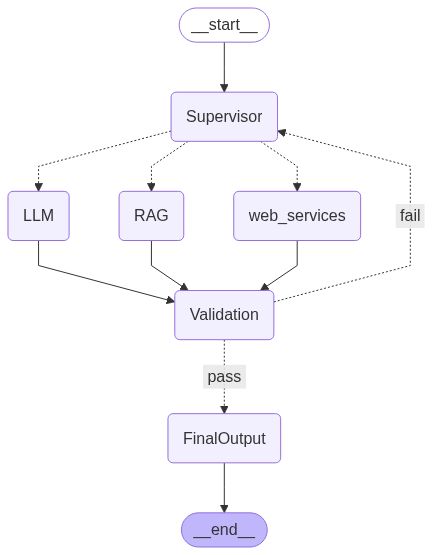

In [534]:
workflow.compile()

In [535]:
app= workflow.compile()

In [536]:
state = {"messages":["What is Atlanta"]}


In [537]:
app.invoke(state)

question What is Atlanta
Parsed response Topic='USA' Reasoning='Atlanta is a major city located in the United States of America, specifically the capital of Georgia. The query directly pertains to a geographical location within the USA.'
-> ROUTER ->
last_messages: USA
->RAG call->
🔍 Validating response: I don't know what Atlanta is based on the provided context. The context only discusses an "Overview of the U.S. Economy."
✅ Validation passed
🏁 Final Output Delivered: I don't know what Atlanta is based on the provided context. The context only discusses an "Overview of the U.S. Economy."


{'messages': ['What is Atlanta',
  'USA',
  'I don\'t know what Atlanta is based on the provided context. The context only discusses an "Overview of the U.S. Economy."',
  'What is Atlanta',
  'USA',
  'I don\'t know what Atlanta is based on the provided context. The context only discusses an "Overview of the U.S. Economy."',
  'What is Atlanta',
  'USA',
  'I don\'t know what Atlanta is based on the provided context. The context only discusses an "Overview of the U.S. Economy."',
  'What is Atlanta',
  'USA',
  'I don\'t know what Atlanta is based on the provided context. The context only discusses an "Overview of the U.S. Economy."']}

In [538]:
state = {"messages":["What is Key Economic Strengths of USA"]}


In [539]:
app.invoke(state)

question What is Key Economic Strengths of USA
Parsed response Topic='USA' Reasoning="The user query explicitly asks about the 'Key Economic Strengths of USA', directly relating to the USA category."
-> ROUTER ->
last_messages: USA
->RAG call->
🔍 Validating response: I don't know the answer based on the provided context. The context only states "Key Economic Strengths" but does not list what those strengths are.
✅ Validation passed
🏁 Final Output Delivered: I don't know the answer based on the provided context. The context only states "Key Economic Strengths" but does not list what those strengths are.


{'messages': ['What is Key Economic Strengths of USA',
  'USA',
  'I don\'t know the answer based on the provided context. The context only states "Key Economic Strengths" but does not list what those strengths are.',
  'What is Key Economic Strengths of USA',
  'USA',
  'I don\'t know the answer based on the provided context. The context only states "Key Economic Strengths" but does not list what those strengths are.',
  'What is Key Economic Strengths of USA',
  'USA',
  'I don\'t know the answer based on the provided context. The context only states "Key Economic Strengths" but does not list what those strengths are.',
  'What is Key Economic Strengths of USA',
  'USA',
  'I don\'t know the answer based on the provided context. The context only states "Key Economic Strengths" but does not list what those strengths are.']}

In [540]:
state = {"messages":["Give me summary of USA economy"]}


In [541]:
app.invoke(state)

question Give me summary of USA economy
Parsed response Topic='USA' Reasoning="The user query explicitly asks for a summary of the 'USA economy', which directly relates to the 'USA' category."
-> ROUTER ->
last_messages: USA
->RAG call->
🔍 Validating response: I don't have enough information from the provided context to summarize the USA economy. The context only states "Overview of the U.S. Economy" without further details.
✅ Validation passed
🏁 Final Output Delivered: I don't have enough information from the provided context to summarize the USA economy. The context only states "Overview of the U.S. Economy" without further details.


{'messages': ['Give me summary of USA economy',
  'USA',
  'I don\'t have enough information from the provided context to summarize the USA economy. The context only states "Overview of the U.S. Economy" without further details.',
  'Give me summary of USA economy',
  'USA',
  'I don\'t have enough information from the provided context to summarize the USA economy. The context only states "Overview of the U.S. Economy" without further details.',
  'Give me summary of USA economy',
  'USA',
  'I don\'t have enough information from the provided context to summarize the USA economy. The context only states "Overview of the U.S. Economy" without further details.',
  'Give me summary of USA economy',
  'USA',
  'I don\'t have enough information from the provided context to summarize the USA economy. The context only states "Overview of the U.S. Economy" without further details.']}

In [543]:
state = {"messages":["Give me summary of India"]}
result = app.invoke(state)
print(result["messages"][-1])  # Should now have substantial content

question Give me summary of India
Parsed response Topic='Not Related' Reasoning="The user query asks for a summary of India. This topic does not fall under 'USA' and is not a query about a 'web_service' itself, but rather a general information request. Therefore, it is 'Not Related' to the given categories."
-> ROUTER ->
last_messages: Not Related
->LLM Call-->
🔍 Validating response: India is a vast and incredibly diverse country located in South Asia. Here's a summary of its key aspects:

1.  **Geography & Demographics:**
    *   **Location:** Occupies most of the Indian subcontinent, bordering Pakistan, China, Nepal, Bhutan, Bangladesh, and Myanmar. It has a long coastline along the Indian Ocean (Arabian Sea and Bay of Bengal).
    *   **Size:** Seventh-largest country by land area.
    *   **Population:** The world's most populous country (as of 2023, surpassing China), with over 1.4 billion people. It's a very young nation, with a significant youth demographic.
    *   **Diversity:

In [ ]:
state = {"messages":["Give me latest news of India on internet "]}
result = app.invoke(state)
print(result["messages"][-1])  # Should now have substantial content

question Give me latest news of India on internet 
Parsed response Topic='web_service' Reasoning="The query 'Give me latest news of India on internet' implies the use of an online service or platform (internet) to retrieve information (news), which falls under the 'web_service' category."
-> ROUTER ->
last_messages: web_service
-->web_services
Based on current web search results for 'Give me latest news of India on internet ':

1. **NDTV.com: Get Latest News, India News, Breaking News, Today's ...**
   NDTV.com provides latest news from India and around the world. Get breaking news alerts from India and follow today's live news updates in field of politics
   Source: https://www.ndtv.com/

2. **Google News India**
   'Mayday call, then altitude loss in seconds': What govt said on Air India crash | Latest News India - Hindustan Times ... internet abuzz. 6 hours ago. More.
   Source: https://news.google.com/home?hl=en-IN&gl=IN&ceid=IN%3Aen

3. **Latest News Today: Breaking News and Top H